# Load Data, Data Wrangling, Train Dataset and Test Dataset Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, zero_one_loss, precision_recall_fscore_support, roc_curve, auc

a = time.time()

In [3]:
# Select only those files with DETAILED RESULTS
RegularSeason_df = pd.read_csv('Data/RegularSeasonDetailedResults.csv')
Tourney_df = pd.read_csv('Data/TourneyDetailedResults.csv')

In [4]:
# Drop unnecessary columns, season index, day number, win location, numbers of overtime
RegularSeason_df = RegularSeason_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)
Tourney_df = Tourney_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)

In [5]:
# Training Data
WinLosePair_df = RegularSeason_df
# WinLosePair_df

In [6]:
# Rename
TrainDataOriginal_1_df = pd.DataFrame(WinLosePair_df[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TrainDataOriginal_2_df = pd.DataFrame(WinLosePair_df[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)


TrainData_df = TrainDataOriginal_1_df.append(TrainDataOriginal_2_df).reset_index(drop = True)
TrainData = TrainData_df.values
TrainLabel = np.ones((len(WinLosePair_df)*2))
TrainLabel[len(WinLosePair_df):] = 2

In [7]:
# Test Data
# Select those rows whose 'School' index has substring 'NCAA'
# Select and then rstrip

Season2018_df = pd.read_csv('Data/2018.csv', skiprows = 1)
NCAA_df = Season2018_df[Season2018_df['School'].str.contains('NCAA')]
NCAA_df['School'] = NCAA_df['School'].map(lambda x: x.rstrip(' NCAA'))
# NCAA_df

/Users/edwardwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
# Annotated manually
ncaa2018_df = pd.read_csv('Data/ncaa2018.csv')
# ncaa2018_df

## Testing on the all the tournaments together using best performing Adaboost classifier

In [9]:
Season2018_stat_df = NCAA_df[['G', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 
                              'TOV', 'STL', 'BLK', 'PF']]
Season2018_stat_df['TRB'] = Season2018_stat_df['TRB'] - Season2018_df['ORB']
Season2018_stat_df.rename(columns = {'TRB': 'DRB'}, inplace = True)
Season2018_avg_df = Season2018_stat_df.div(Season2018_stat_df.G, axis = 0).join(NCAA_df['School'])
Season2018_avg_df.drop('G', axis=1, inplace=True)
Season2018_avg_df.columns = ['fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 
                            'stl', 'blk', 'pf', 'School']
# Season2018_avg_df

/Users/edwardwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/edwardwu/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
# half with first team winning, half with second team winning, to make the class more balanced
Tourney_df1 = Tourney_df.iloc[0 : int(len(Tourney_df)/2)]
Tourney_df2 = Tourney_df.iloc[int(len(Tourney_df)/2) : ]
TestDataOriginal_1_df = pd.DataFrame(Tourney_df1[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TestDataOriginal_2_df = pd.DataFrame(Tourney_df2[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)

TestData_df = TestDataOriginal_1_df.append(TestDataOriginal_2_df).reset_index(drop = True)
# TestData_df

In [11]:

Test_df = pd.merge(ncaa2018_df, Season2018_avg_df, left_on = 'School_x', right_on = 'School', how = 'inner')
Test_df = pd.merge(Test_df, Season2018_avg_df, left_on = 'School_y', right_on = 'School', how = 'inner')
Results = Test_df['Results'].values

# creating labels for tournament testing data
TestLabel1 = np.ones((1, int(TestData_df.shape[0] / 2)))
TestLabel2 = np.ones((1, int(TestData_df.shape[0] / 2))) * 2
TestLabel = np.append(TestLabel1 , TestLabel2)
TestLabel = np.append(Results, TestLabel)

Test_df = Test_df.drop(['School_x', 'School_y', 'Rk_x', 'G_x', 'Results', 'Rk_y', 'G_y'], axis = 1)

# add the past tournament data
Test_df = Test_df.append(TestData_df)

Test_df = Test_df.astype(int)
TestData = Test_df.values
# Test_df

In [14]:
# Logistic Regression
log_clf = LogisticRegression()
log_clf.fit(TrainData, TrainLabel)
print ('Logistic Regression')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, log_clf.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, log_clf.predict(TestData), average = "weighted"))
print ('----------------------------------')

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(TrainData, TrainLabel)
print ('LDA')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, lda.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, lda.predict(TestData), average = "weighted"))
print ('----------------------------------')

# Naive Bayes
gnb = GaussianNB()
gnb.fit(TrainData, TrainLabel)
print ('Naive Bayes')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, gnb.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, gnb.predict(TestData), average = "weighted"))
print ('----------------------------------')

# KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(TrainData, TrainLabel)
print ('KNN')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, knn.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel,knn.predict(TestData), average = "weighted"))
print ('----------------------------------')

# SVM
svm = SVC()
svm.fit(TrainData, TrainLabel)
print ('SVM')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, svm.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, svm.predict(TestData), average = "weighted"))
print ('----------------------------------')

# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(TrainData, TrainLabel)
print ('Decision Tree')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, dt.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, dt.predict(TestData), average = "weighted"))
print ('----------------------------------')

# Random Forest
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(TrainData, TrainLabel)
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, rf.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, rf.predict(TestData), average = "weighted"))
print ('----------------------------------')

# Adaboost
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(TrainData, TrainLabel)
print ('Adaboost')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, adb.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, adb.predict(TestData), average = "weighted"))
print ('----------------------------------')

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(TrainData, TrainLabel)
print ('Gradient Boosting')
print ('Accuracy: ', end = '')
print (accuracy_score(TestLabel, gb.predict(TestData)))
print ('Precision-Recall-F1')
print (precision_recall_fscore_support(TestLabel, gb.predict(TestData), average = "weighted"))

Logistic Regression
Accuracy: 0.9720496894409938
Precision-Recall-F1
(0.9723090244289273, 0.9720496894409938, 0.9720533141577276, None)
----------------------------------
LDA
Accuracy: 0.9306418219461697
Precision-Recall-F1
(0.9307043323762246, 0.9306418219461697, 0.9306481416521241, None)
----------------------------------
Naive Bayes
Accuracy: 0.8830227743271222
Precision-Recall-F1
(0.8830914093147544, 0.8830227743271222, 0.8830334329356722, None)
----------------------------------
KNN
Accuracy: 0.8519668737060041
Precision-Recall-F1
(0.862167430386709, 0.8519668737060041, 0.8505678222744265, None)
----------------------------------
SVM
Accuracy: 0.8944099378881988
Precision-Recall-F1
(0.8947131378781453, 0.8944099378881988, 0.8944235177884977, None)
----------------------------------
Decision Tree
Accuracy: 0.8478260869565217
Precision-Recall-F1
(0.8478823742678682, 0.8478260869565217, 0.8477805422778448, None)
----------------------------------
Accuracy: 0.9140786749482401
Precisio

# Visualization of the classifier performance

## Comparing four classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_error_mean = np.mean(1-train_scores, axis=1)
    train_error_std = np.std(1-train_scores, axis=1)
    test_error_mean = np.mean(1-test_scores, axis=1)
    test_error_std = np.std(1-test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_error_mean - train_error_std,
                     train_error_mean + train_error_std, alpha=0.1, color="r"
                     )
    plt.fill_between(train_sizes, test_error_mean - test_error_std,
                     test_error_mean + test_error_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_error_mean, 'o-', color="r",
             label=" Training error")
    plt.plot(train_sizes, test_error_mean, 'o-', color="g",
             label=" Cross-validation error")
    plt.legend(loc="best")
    plt.show()
#     return plt


X_test,y_test = TestData, TestLabel
X_train,y_train = TrainData, TrainLabel

print("start")

title = "Learning Curves for Random Forest"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0, 0.35), cv=cv, n_jobs=4)


title = "Learning Curves for Adaboost Classifier"
estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0, 0.35), cv=cv, n_jobs=4)


title = "Learning Curves for Gradient Boosting Tree"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0, 0.35), cv=cv, n_jobs=4)


title = "Learning Curves for Logistic Regression"
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0, 0.35), cv=cv, n_jobs=-1)


# plt.show()

## Comparing adaboost and gradient boosting tree

total running time of this example is : 344.9588119983673


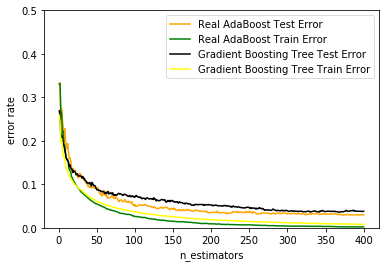

In [12]:
n_estimators = 400
learning_rate = 1
X_test,y_test = TestData, TestLabel
X_train,y_train = TrainData, TrainLabel

dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err=1.0-dt_stump.score(X_test,y_test)
 
# dt=DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
# dt.fit(X_train,y_train)
# dt_err=1.0-dt.score(X_test,y_test)
 
# ada_discrete=AdaBoostClassifier(base_estimator=dt_stump,learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME')
# ada_discrete.fit(X_train,y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=n_estimators)
rf_clf.fit(X_train,y_train)

# Gradient Boosting Tree
gbm_clf = GradientBoostingClassifier(n_estimators=n_estimators) # default n_estimator is 100
gbm_clf.fit(X_train,y_train)
 
# base_estimator=dt_stump
ada_real=AdaBoostClassifier(learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME.R')
ada_real.fit(X_train,y_train)
 
fig=plt.figure()
ax=fig.add_subplot(111)
# ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label='Decision Stump Error')
# ax.plot([1,n_estimators],[dt_err]*2,'k--',label='Decision Tree Error')
 
# ada_discrete_err=np.zeros((n_estimators,))
# for i,y_pred in enumerate(ada_discrete.staged_predict(X_test)):
#     ada_discrete_err[i]=zero_one_loss(y_pred,y_test)    ######zero_one_loss
# ada_discrete_err_train=np.zeros((n_estimators,))
# for i,y_pred in enumerate(ada_discrete.staged_predict(X_train)):
#     ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
    
ada_real_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i]=zero_one_loss(y_pred,y_test)
ada_real_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i]=zero_one_loss(y_pred,y_train)
    
gbm_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(gbm_clf.staged_predict(X_test)):
    gbm_err[i]=zero_one_loss(y_pred,y_test)
gbm_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(gbm_clf.staged_predict(X_train)):
    gbm_err_train[i]=zero_one_loss(y_pred,y_train)

ax.plot(np.arange(n_estimators)+1,ada_real_err,label='Real AdaBoost Test Error',color='orange')
ax.plot(np.arange(n_estimators)+1,ada_real_err_train,label='Real AdaBoost Train Error',color='green')
# ax.plot(np.arange(n_estimators)+1,rf_err,label='Random Forest Test Error',color='red')
# ax.plot(np.arange(n_estimators)+1,rf_err_train,label='Random Forest Train Error',color='blue')
ax.plot(np.arange(n_estimators)+1,gbm_err,label='Gradient Boosting Tree Test Error',color='black')
ax.plot(np.arange(n_estimators)+1,gbm_err_train,label='Gradient Boosting Tree Train Error',color='yellow')
 
ax.set_ylim((0.0,0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
 
leg=ax.legend(loc='upper right',fancybox=True)
leg.get_frame().set_alpha(0.7)
b=time.time()
print('total running time of this example is :',b-a)
plt.show()



## ROC curve for logistic and adaboost

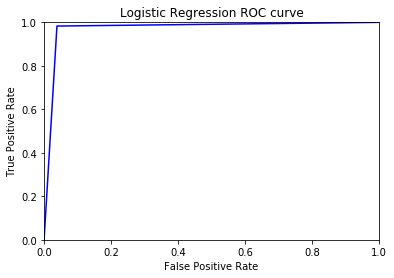

In [16]:
fpr, tpr, thresholds = roc_curve(TestLabel, log_clf.predict(TestData), pos_label=2)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Logistic Regression ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

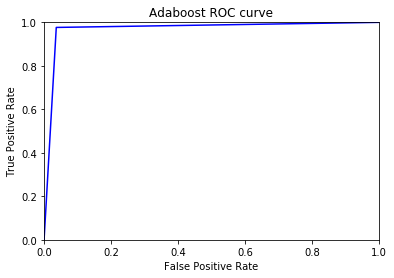

In [17]:
fpr, tpr, thresholds = roc_curve(TestLabel, ada_real.predict(TestData), pos_label=2)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Adaboost ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

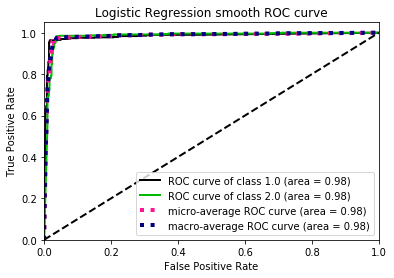

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = TestLabel
y_probas = log_clf.predict_proba(TestData)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title("Logistic Regression smooth ROC curve")
plt.show()

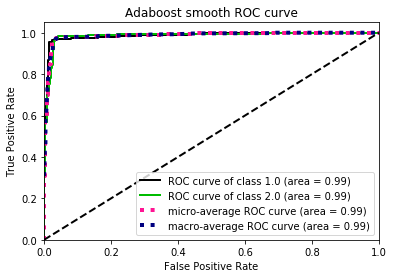

In [19]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = TestLabel
y_probas = ada_real.predict_proba(TestData)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title("Adaboost smooth ROC curve")
plt.show()

# Testing on this year's tournament on some single games

In [20]:
# random game from this year's tournament (UMBC vs. Virginia)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Maryland-Baltimore County']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Virginia']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [22]:
log_clf.predict(test_game) # UMBC won, predicted correctly

array([ 1.])

In [23]:
# random game from this year's tournament (Missouri vs. Florida State)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Missouri']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Florida State']
columns_use = t1.columns.tolist()
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [25]:
log_clf.predict(test_game) # FSU won, predicted correctly

array([ 2.])

In [26]:
# random game from this year's tournament (Duke vs. Iona)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Duke']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Iona']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [28]:
log_clf.predict(test_game) # Duke won, predicted correctly

array([ 1.])

In [29]:
# random game from this year's tournament (Arizona vs. Buffalo)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Arizona']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Buffalo']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [31]:
log_clf.predict(test_game) # Buffalo won, predicted correctly

array([ 2.])

In [32]:
# random game from this year's tournament (Villanova vs. Radford)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Radford']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Villanova']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [34]:
log_clf.predict(test_game) # Villanova won, predicted correctly

array([ 2.])

# Generating plots between game statistics and game outcomes

In [ ]:
plotlist = ['fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']

for key in plotlist:
    x = WinLosePair_df['W' + key]
    y = WinLosePair_df['L' + key]
    plt.figure()
    plt.plot(range(len(WinLosePair_df['W' + key])), x, 'o-', color = "r", label=" Win")
    plt.plot(range(len(WinLosePair_df['L' + key])), y, '*-', color = "g", label=" Lose")
    plt.xlabel("Team")
    plt.ylabel("Value")
    plt.legend(loc="best")
    plt.title(key + '_Comparison')
    plt.savefig('Plots/' + key + '_Comparison')

In [ ]:
x = WinLosePair_df['Wfgm'] / WinLosePair_df['Wfga']
y = WinLosePair_df['Lfgm'] / WinLosePair_df['Lfga']
plt.figure()
plt.plot(range(len(WinLosePair_df['Wfgm'])), x, 'o-', color = "r", label=" Win")
plt.plot(range(len(WinLosePair_df['Lfgm'])), y, '*-', color = "g", label=" Lose")
plt.xlabel("Team")
plt.ylabel("Value")
plt.legend(loc="best")
plt.title('ShootingAverage_Comparison')
plt.savefig('Plots/' + 'ShootingAverage_Comparison')

# Plotting differences between teams in game statistics and corresponding winning probabilities generated by our chosen classifier

In [35]:
winning_probabilities = log_clf.predict_proba(TestData)

In [36]:
win_prob_1 = winning_probabilities[:, 0]

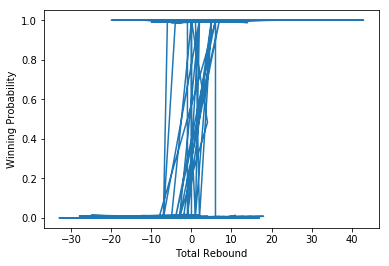

In [37]:
# Total Rebound
plt.plot(Test_df['or_x']+Test_df['dr_x']-Test_df['or_y']-Test_df['dr_y'], win_prob_1)
plt.ylabel("Winning Probability")
plt.xlabel("Total Rebound")
plt.show()

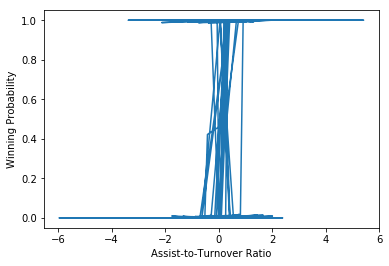

In [38]:
# Assist-to-Turnover Ratio
plt.plot(Test_df['ast_x']/Test_df['to_x']-Test_df['ast_y']/Test_df['to_y'], win_prob_1)
plt.ylabel("Winning Probability")
plt.xlabel("Assist-to-Turnover Ratio")
plt.show()

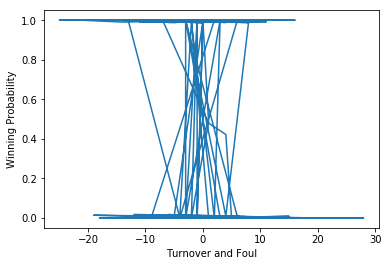

In [39]:
# Turnover and Foul
plt.plot(Test_df['to_x']+Test_df['pf_x']-Test_df['to_y']-Test_df['pf_y'], win_prob_1)
plt.ylabel("Winning Probability")
plt.xlabel("Turnover and Foul")
plt.show()

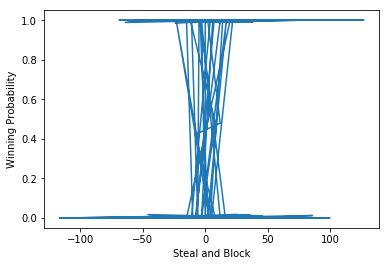

In [40]:
# Steal and Block
plt.plot(Test_df['stl_x']*Test_df['blk_x']-Test_df['stl_y']*Test_df['blk_y'], win_prob_1)
plt.ylabel("Winning Probability")
plt.xlabel("Steal and Block")
plt.show()